In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
df = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [104]:
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [60]:
df[df['GDP (millions of US$)']<0]

,Country,Continent,GDP (millions of US$)


In [10]:
df.isna()
df.dropna()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


1. So sánh GDP các nước khu vực South America


In [76]:
df1 = df[df['Continent']== 'South America']
df1

,Country,Continent,GDP (millions of US$)
4,Argentina,South America,447644
15,Brazil,South America,2492908
22,Chile,South America,248411
24,Colombia,South America,328422
34,Ecuador,South America,66381
86,Paraguay,South America,21236
87,Peru,South America,173502
119,Uruguay,South America,46872
121,Venezuela,South America,315841


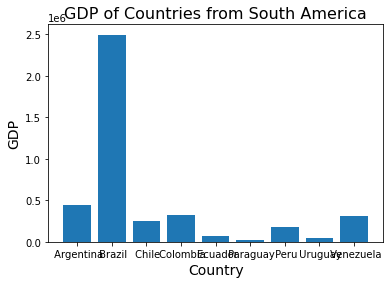

In [62]:
plt.bar(df1['Country'],df1['GDP (millions of US$)'])

plt.title('GDP of Countries from South America', fontsize = 16)

plt.xlabel('Country', fontsize = 14)

plt.ylabel('GDP', fontsize = 14)

plt.show()



Nhận xét: Trong các nước nam Mỹ, GDP của Brazil cao nhất, xếp sau la Argentina và venuzuala; nước có GDP thấp nhất là Paraguay

------------------------------------------------------------------------

2. Đánh giá tỷ trọng của GDP của VN trong 5 nước Đông Á Vietnam,  Indonesia, Cambodia

In [105]:
df5 =df
df5['Country']= df5['Country'].str[1:]
df5
# | (df['Country'] == 'Indonesia') | (df['Country'] =='Cambodia')

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


In [106]:
df5 = df5[(df5['Country']=='Vietnam')| (df5['Country'] == 'Indonesia') | (df5['Country'] =='Cambodia')]
df5

,Country,Continent,GDP (millions of US$)
19,Cambodia,Asia,12861
53,Indonesia,Asia,845680
122,Vietnam,Asia,122722


In [108]:
df5['Percentage']=df5['GDP (millions of US$)']/df5['GDP (millions of US$)'].sum()
df5

/tmp/ipykernel_11440/1755905424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Percentage']=df5['GDP (millions of US$)']/df5['GDP (millions of US$)'].sum()


,Country,Continent,GDP (millions of US$),Percentage
19,Cambodia,Asia,12861,0.013107
53,Indonesia,Asia,845680,0.861828
122,Vietnam,Asia,122722,0.125065


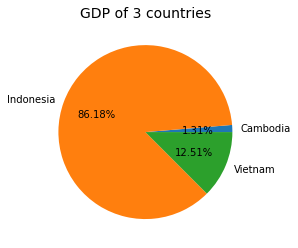

In [112]:
labels = list(df5['Country'])
sizes = list(df5['Percentage'])
plt.pie(sizes, labels = labels,autopct='%1.2f%%')
plt.title('GDP of 3 countries', fontsize = 14)
plt.show()